In [19]:
import numpy as np
import pandas as pd
import fix_yahoo_finance as fyf

In [20]:
stocks = 'FB AMZN NFLX GOOG AAPL'
stocks = stocks.split()
data = fyf.download(stocks, '2018-05-01')['Close']
data.head()

[*********************100%***********************]  5 of 5 downloaded


,AAPL,AMZN,FB,GOOG,NFLX
Date,,,,,
2018-04-30,165.26,1566.13,172.00,1017.33,312.46
2018-05-01,169.10,1582.26,173.86,1037.31,313.30
2018-05-02,176.57,1569.68,176.07,1024.38,313.36
2018-05-03,176.89,1572.08,174.02,1023.72,311.69
2018-05-04,183.83,1580.95,176.61,1048.21,320.09


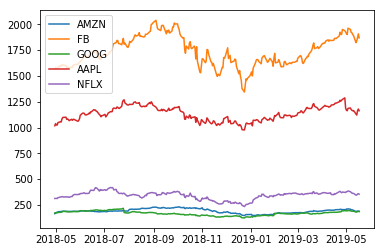

In [21]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(data)
plt.legend(['AMZN', 'FB', 'GOOG', 'AAPL', 'NFLX'], loc=2)

In [22]:
returns = pd.DataFrame()
for stock in data:
    if stock not in returns:
       returns[stock] = np.log(data[stock]).diff()
returns = returns[1:]
returns.head()

,AAPL,AMZN,FB,GOOG,NFLX
Date,,,,,
2018-05-01,0.022970,0.010247,0.010756,0.019449,0.002685
2018-05-02,0.043227,-0.007982,0.012631,-0.012543,0.000191
2018-05-03,0.001811,0.001528,-0.011711,-0.000644,-0.005344
2018-05-04,0.038483,0.005626,0.014774,0.023641,0.026593
2018-05-07,0.007209,0.012065,0.007671,0.006258,0.019092


In [23]:
returns.describe()

,AAPL,AMZN,FB,GOOG,NFLX
count,264.000000,264.000000,264.000000,264.000000,264.000000
mean,0.000508,0.000670,0.000282,0.000505,0.000478
std,0.019126,0.021520,0.023489,0.016714,0.026958
min,-0.104924,-0.081424,-0.210239,-0.080089,-0.098759
25%,-0.007968,-0.007858,-0.008793,-0.007199,-0.013221
50%,0.001610,0.001458,-0.000078,0.000223,-0.000119
75%,0.009313,0.011098,0.011811,0.010159,0.015438
max,0.068053,0.090254,0.102704,0.062769,0.092793


In [24]:
returns.corr()

,AAPL,AMZN,FB,GOOG,NFLX
AAPL,1.000000,0.674327,0.438899,0.639333,0.527966
AMZN,0.674327,1.000000,0.578970,0.768602,0.705024
FB,0.438899,0.578970,1.000000,0.562343,0.435741
GOOG,0.639333,0.768602,0.562343,1.000000,0.606290
NFLX,0.527966,0.705024,0.435741,0.606290,1.000000


In [25]:
returns.corr()['AMZN'].sort_values(ascending=False)

AMZN    1.000000
GOOG    0.768602
NFLX    0.705024
AAPL    0.674327
FB      0.578970
Name: AMZN, dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0DEBBC10>,
      dtype=object)

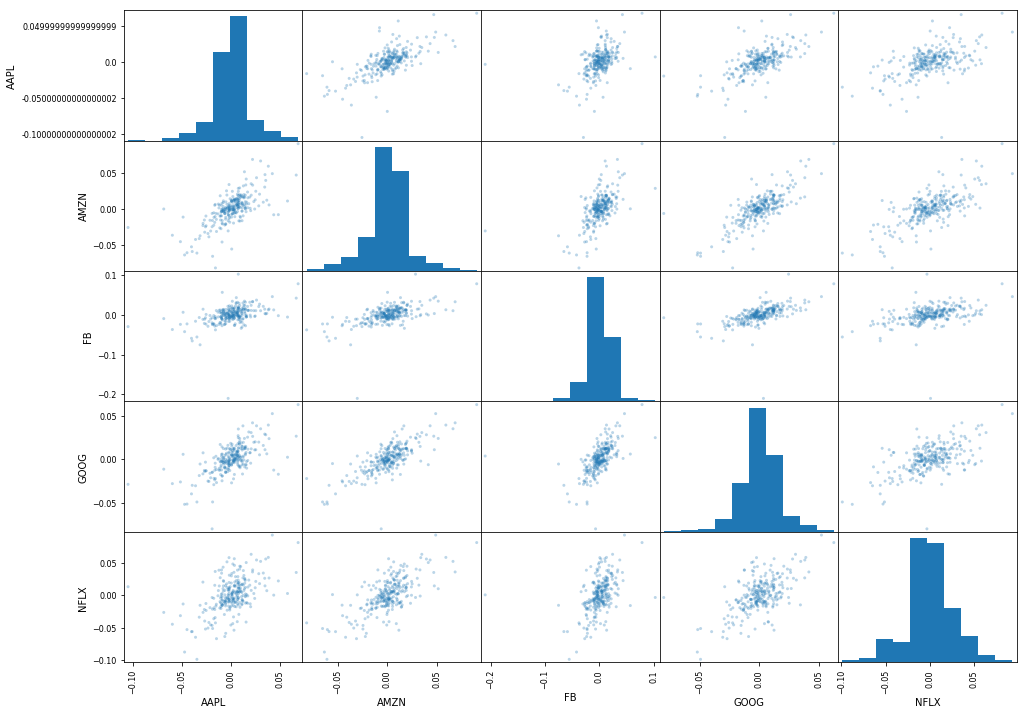

In [26]:
from pandas.plotting import scatter_matrix
scatter_matrix(returns, figsize=(16,12), alpha=0.3)